In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


import seaborn as sns
sns.set()



In [2]:
df = pd.read_csv('WSNBFSFdataset V2.csv')
df.head()

Event      Time  S_Node  Node_id  Rest_Energy  Trace_Level  Mac_Type_Pckt  \
0      1  0.100000      79       79   600.000000            5              0   
1      2  0.100963      78       78   599.979723            5            800   
2      2  0.100963      76       76   599.979722            5            800   
3      2  0.100964      75       75   599.979722            5            800   
4      2  0.100964     118      118   599.979722            5            800   

   Source_IP_Port  Des_IP_Port  Packet_Size  ...  Broadcast_ID  Dest_Node_Num  \
0          79.255        1.255           48  ...             1            100   
1          79.255        1.255           48  ...             1            100   
2          79.255        1.255           48  ...             1            100   
3          79.255        1.255           48  ...             1            100   
4          79.255        1.255           48  ...             1            100   

   Dest_Seq_Num  Src_Node_ID  Src_Seq_Num  behaviour    Type  \
0             0           79            4  No attack  normal   
1             0           79            4  No attack  normal   
2             0           79            4  No attack  normal   
3             0           79            4  No attack  normal   
4             0           79            4  No attack  normal   

  rate_of_energy_consumption cumulative_energy_consumption  energy_consumption  
0                        0.0                           0.0                 0.0  
1                        0.0                           0.0                 0.0  
2                        0.0                           0.0                 0.0  
3                        0.0                           0.0                 0.0  
4                        0.0                           0.0                 0.0  

[5 rows x 22 columns]

In [3]:
# Discovere if there are null values :)
df.isna().any()

Event                            False
Time                             False
S_Node                           False
Node_id                          False
Rest_Energy                      False
Trace_Level                      False
Mac_Type_Pckt                    False
Source_IP_Port                   False
Des_IP_Port                      False
Packet_Size                      False
TTL                              False
Hop_Count                        False
Broadcast_ID                     False
Dest_Node_Num                    False
Dest_Seq_Num                     False
Src_Node_ID                      False
Src_Seq_Num                      False
behaviour                        False
Type                             False
rate_of_energy_consumption       False
cumulative_energy_consumption    False
energy_consumption               False
dtype: bool

In [4]:
# Mapping behaviour & Type Columns :)
df['behaviour'].replace({'No attack':0,'Under attack':1},inplace=True)
df['Type'].replace({'normal':0,'Flooding':1,'Blackhole':2,'Forwarding':3},inplace=True)

In [5]:
# storing the input values in the X variable
X = df.drop(["TTL"], axis=1)

# storing all the ouputs in y variable
y_TTL = df["TTL"]

# scorelist
scorelist_r2_bar = []
algorthim_r2_bar = []
feature_r2_bar = []

scorelist_mae_bar = []
algorthim_mae_bar = []
feature_mae_bar = []

# scorelist
scorelist_r2_box = []
algorthim_r2_box = []
feature_r2_box = []

# scorelist
scorelist_mae_box = []
algorthim_mae_box = []
feature_mae_box = []

# Calculate 'mean_absolute_error' MAE
from sklearn.metrics import mean_absolute_error
MAE = []

MAE_1 = []
# ..........
print(f"ny_TTL shape:{y_TTL.shape}")

ny_TTL shape:(312106,)


In [6]:
# Feature scaling
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X), columns = df.columns.drop("TTL"))

In [7]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Create an empty DataFrame to store results
results_df = pd.DataFrame(columns=['Number of Features (k)', 'R-squared', 'Selected Features'])

# Create a range of k values you want to try
k_values = range(1, len(X.columns) - 1)

for k in k_values:
    # Instantiate the feature selection model for TTL prediction
    selector_TTL = SelectKBest(score_func=f_regression, k=k)
    # Split the data into training and testing sets
    X_train_TTL, X_test_TTL, y_train_TTL, y_test_TTL = train_test_split(X, y_TTL, test_size=0.2, random_state=k)
    # Fit the model on the training data for TTL prediction
    selector_TTL.fit(X_train_TTL, y_train_TTL)

    # Transform the training and testing sets for TTL prediction to keep only the selected features
    X_train_selected_TTL_Kbest = selector_TTL.transform(X_train_TTL)
    X_test_selected_TTL_Kbest = selector_TTL.transform(X_test_TTL)

    # Get the indices of the selected features
    selected_feature_indices_TTL = selector_TTL.get_support(indices=True)

    # Get the names of the selected features
    selected_features_TTL = X_train_TTL.columns[selected_feature_indices_TTL]

    # Create and train a linear regression model
    model = LinearRegression()
    model.fit(X_train_selected_TTL_Kbest, y_train_TTL)

    # Predict using the model
    y_pred_TTL = model.predict(X_test_selected_TTL_Kbest)

    # Calculate R-squared score
    r2 = r2_score(y_test_TTL, y_pred_TTL)

    # Append results to the DataFrame
    results_df = results_df.append({'Number of Features (k)': k, 'R-squared': r2, 'Selected Features': selected_features_TTL}, ignore_index=True)

# Print the DataFrame with results
print(results_df)

# Find the row with the highest R-squared value
best_result = results_df.loc[results_df['R-squared'].idxmax()]




/tmp/ipykernel_33218/2923923555.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Number of Features (k)': k, 'R-squared': r2, 'Selected Features': selected_features_TTL}, ignore_index=True)
/tmp/ipykernel_33218/2923923555.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Number of Features (k)': k, 'R-squared': r2, 'Selected Features': selected_features_TTL}, ignore_index=True)
/tmp/ipykernel_33218/2923923555.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Number of Features (k)': k, 'R-squared': r2, 'Selected Features': selected_features_TTL}, ignore_index=True)
/tmp/ipykernel_33218/2923923555.py:41: FutureWarning

   Number of Features (k)  R-squared  \
0                       1   0.275624   
1                       2   0.457153   
2                       3   0.486179   
3                       4   0.489285   
4                       5   0.497016   
5                       6   0.534843   
6                       7   0.561444   
7                       8   0.567584   
8                       9   0.562592   
9                      10   0.560886   
10                     11   0.563290   
11                     12   0.563839   
12                     13   0.575229   
13                     14   0.614898   
14                     15   0.610555   
15                     16   0.617501   
16                     17   0.607196   
17                     18   0.614740   
18                     19   0.623173   

                                    Selected Features  
0             Index(['Dest_Seq_Num'], dtype='object')  
1   Index(['Hop_Count', 'Dest_Seq_Num'], dtype='ob...  
2   Index(['Hop_Count', 'Dest_S

/tmp/ipykernel_33218/2923923555.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Number of Features (k)': k, 'R-squared': r2, 'Selected Features': selected_features_TTL}, ignore_index=True)


In [8]:
# Best K => 14
# Columns which is selected :)
selected_feature_indices_TTL_Kbest = results_df[results_df['Number of Features (k)']==14]['Selected Features']
# selected_feature_indices_TTL_Kbest
selected_feature_indices_TTL_Kbest.values

array([Index(['Time', 'S_Node', 'Node_id', 'Source_IP_Port', 'Packet_Size',
              'Hop_Count', 'Broadcast_ID', 'Dest_Node_Num', 'Dest_Seq_Num',
              'Src_Node_ID', 'Src_Seq_Num', 'behaviour', 'Type',
              'energy_consumption'],
             dtype='object')                                               ],
      dtype=object)

In [9]:
# Best Feature :)
selected_features_TTL_Kbest = X[['Time', 'S_Node', 'Node_id', 'Source_IP_Port', 'Packet_Size',
              'Hop_Count', 'Broadcast_ID', 'Dest_Node_Num', 'Dest_Seq_Num',
              'Src_Node_ID', 'Src_Seq_Num', 'behaviour', 'Type',
              'energy_consumption']]
selected_features_TTL_Kbest

Time    S_Node   Node_id  Source_IP_Port  Packet_Size  Hop_Count  \
0       0.000000  0.396985  0.396985        0.396985          0.0        0.0   
1       0.000001  0.391960  0.391960        0.396985          0.0        0.0   
2       0.000001  0.381910  0.381910        0.396985          0.0        0.0   
3       0.000001  0.376884  0.376884        0.396985          0.0        0.0   
4       0.000001  0.592965  0.592965        0.396985          0.0        0.0   
...          ...       ...       ...             ...          ...        ...   
312101  0.966819  0.703518  0.703518        0.703518          0.0        0.0   
312102  0.967825  0.703518  0.703518        0.703518          0.0        0.0   
312103  0.968830  0.703518  0.703518        0.703518          0.0        0.0   
312104  0.969836  0.703518  0.703518        0.703518          0.0        0.0   
312105  1.000000  0.703518  0.703518        0.703518          0.0        0.0   

        Broadcast_ID  Dest_Node_Num  Dest_Seq_Num  Src_Node_ID  Src_Seq_Num  \
0           0.000000       0.392638      0.000000     0.420213     0.000000   
1           0.000000       0.392638      0.000000     0.420213     0.000000   
2           0.000000       0.392638      0.000000     0.420213     0.000000   
3           0.000000       0.392638      0.000000     0.420213     0.000000   
4           0.000000       0.392638      0.000000     0.420213     0.000000   
...              ...            ...           ...          ...          ...   
312101      0.434783       0.392638      0.941176     0.744681     0.457143   
312102      0.463768       0.392638      0.941176     0.744681     0.485714   
312103      0.492754       0.392638      0.941176     0.744681     0.514286   
312104      0.521739       0.392638      0.941176     0.744681     0.542857   
312105      0.594203       0.392638      0.941176     0.744681     0.614286   

        behaviour      Type  energy_consumption  
0             0.0  0.000000            0.000000  
1             0.0  0.000000            0.000000  
2             0.0  0.000000            0.000000  
3             0.0  0.000000            0.000000  
4             0.0  0.000000            0.000000  
...           ...       ...                 ...  
312101        1.0  0.666667            0.018874  
312102        1.0  0.666667            0.018874  
312103        1.0  0.666667            0.018847  
312104        1.0  0.666667            0.018870  
312105        1.0  0.666667            0.565886  

[312106 rows x 14 columns]

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize lists to store results
r2_scores_Lr_Kbest = []
mae_scores_Lr_Kbest = []
mse_scores_Lr_Kbest = []
rmse_scores_Lr_Kbest = []

# Perform the process for 30 runs
for i in range(30):

    # Split the data into training and testing sets
    X_train_TTL, X_test_TTL, y_train_TTL, y_test_TTL = train_test_split(selected_features_TTL_Kbest, y_TTL, test_size=0.2, random_state=i)
    # Train a linear regression model on the selected features for TTL prediction
    model_TTL_Lr = LinearRegression()
    model_TTL_Lr.fit(X_train_selected_TTL_Kbest, y_train_TTL)

    # Make predictions on the testing set for TTL prediction
    y_pred_TTL_Lr = model_TTL_Lr.predict(X_test_selected_TTL_Kbest)

    # Calculate regression metrics for TTL prediction
    mae_TTL_Lr_Kbest = mean_absolute_error(y_test_TTL, y_pred_TTL_Lr)
    mse_TTL_Lr_Kbest = mean_squared_error(y_test_TTL, y_pred_TTL_Lr)
    rmse_TTL_Lr_Kbest = mean_squared_error(y_test_TTL, y_pred_TTL_Lr, squared=False)
    r2_TTL_Lr_Kbest = r2_score(y_test_TTL, y_pred_TTL_Lr)

    # Append metrics to respective lists
    r2_scores_Lr_Kbest.append(r2_TTL_Lr_Kbest)
    mae_scores_Lr_Kbest.append(mae_TTL_Lr_Kbest)
    mse_scores_Lr_Kbest.append(mse_TTL_Lr_Kbest)
    rmse_scores_Lr_Kbest.append(rmse_TTL_Lr_Kbest)

# Calculate the average metrics
average_r2_Lr_Kbest = np.mean(r2_scores_Lr_Kbest)
average_mae_Lr_Kbest = np.mean(mae_scores_Lr_Kbest)
average_mse_Lr_Kbest = np.mean(mse_scores_Lr_Kbest)
average_rmse_Lr_Kbest = np.mean(rmse_scores_Lr_Kbest)

# Append results to respective lists
scorelist_r2_bar.append(average_r2_Lr_Kbest)
algorthim_r2_bar.append("LR_Kbest")
feature_r2_bar.append("TTL")

# Append to lists
scorelist_mae_bar.append(average_mae_Lr_Kbest)
algorthim_mae_bar.append("LR_Kbest")
feature_mae_bar.append("TTL")

# Append to lists
scorelist_r2_box.append(r2_scores_Lr_Kbest)
algorthim_r2_box.append("LR_Kbest")
feature_r2_box.append("TTL")

# Append to lists
scorelist_mae_box.append(mae_scores_Lr_Kbest)
algorthim_mae_box.append("LR_Kbest")
feature_mae_box.append("TTL")

MAE.append(average_mae_Lr_Kbest)


In [11]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize lists to store results
r2_scores_Knn_Kbest = []
mae_scores_Knn_Kbest = []
mse_scores_Knn_Kbest = []
rmse_scores_Knn_Kbest = []

# Perform the process for 30 runs
for i in range(30):

    X_train_selected_TTL_Kbest, X_test_selected_TTL_Kbest, y_train_TTL, y_test_TTL= train_test_split(selected_features_TTL_Kbest, y_TTL, test_size=0.2,random_state=i)

    # Train a KNN model on the selected features for TTL prediction
    model_TTL_Knn = KNeighborsRegressor(n_neighbors=3)  # You can adjust n_neighbors as needed
    model_TTL_Knn.fit(X_train_selected_TTL_Kbest, y_train_TTL)

    # Make predictions on the testing set for TTL prediction
    y_pred_TTL_Knn = model_TTL_Knn.predict(X_test_selected_TTL_Kbest)

    # Calculate regression metrics for TTL prediction
    mae_TTL_Knn_Kbest = mean_absolute_error(y_test_TTL, y_pred_TTL_Knn)
    mse_TTL_Knn_Kbest = mean_squared_error(y_test_TTL, y_pred_TTL_Knn)
    rmse_TTL_Knn_Kbest = mean_squared_error(y_test_TTL, y_pred_TTL_Knn, squared=False)
    r2_TTL_Knn_Kbest = r2_score(y_test_TTL, y_pred_TTL_Knn)

    # Append metrics to respective lists
    r2_scores_Knn_Kbest.append(r2_TTL_Knn_Kbest)
    mae_scores_Knn_Kbest.append(mae_TTL_Knn_Kbest)
    mse_scores_Knn_Kbest.append(mse_TTL_Knn_Kbest)
    rmse_scores_Knn_Kbest.append(rmse_TTL_Knn_Kbest)

# Calculate the average metrics
average_r2_Knn_Kbest = np.mean(r2_scores_Knn_Kbest)
average_mae_Knn_Kbest = np.mean(mae_scores_Knn_Kbest)
average_mse_Knn_Kbest = np.mean(mse_scores_Knn_Kbest)
average_rmse_Knn_Kbest = np.mean(rmse_scores_Knn_Kbest)

# Print the average metrics
print("Average R2 score:", average_r2_Knn_Kbest)
print("Average MAE:", average_mae_Knn_Kbest)
print("Average MSE:", average_mse_Knn_Kbest)
print("Average RMSE:", average_rmse_Knn_Kbest)

# Append to lists
scorelist_r2_bar.append(average_r2_Knn_Kbest)
algorthim_r2_bar.append("KNN_Kbest")
feature_r2_bar.append("TTL")

MAE.append(average_mae_Knn_Kbest)

# Append to lists
scorelist_mae_bar.append(average_mae_Knn_Kbest)
algorthim_mae_bar.append("KNN_Kbest")
feature_mae_bar.append("TTL")

# Append to lists
scorelist_r2_box.append(r2_scores_Knn_Kbest)
algorthim_r2_box.append("KNN_Kbest")
feature_r2_box.append("TTL")

# Append to lists
scorelist_mae_box.append(mae_scores_Knn_Kbest)
algorthim_mae_box.append("KNN_Kbest")
feature_mae_box.append("TTL")


Average R2 score: 0.9980906775286802
Average MAE: 0.020847884826930663
Average MSE: 0.06215905598334869
Average RMSE: 0.24721294069556152


In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize lists to store results
r2_scores_RFR_Kbest = []
mae_scores_RFR_Kbest = []
mse_scores_RFR_Kbest = []
rmse_scores_RFR_Kbest = []

# Perform the process for 30 runs
for i in range(30):

    X_train_TTL, X_test_TTL, y_train_TTL, y_test_TTL = train_test_split(selected_features_TTL_Kbest, y_TTL, test_size=0.2, random_state=i)

    # Train a Random Forest Regression model on the selected features for TTL prediction
    model_TTL_Rfr = RandomForestRegressor(n_estimators=20, random_state=0)  # You can adjust n_estimators as needed
    model_TTL_Rfr.fit(X_train_selected_TTL_Kbest, y_train_TTL)

    # Make predictions on the testing set for TTL prediction
    y_pred_TTL_Rfr = model_TTL_Rfr.predict(X_test_selected_TTL_Kbest)

    # Calculate regression metrics for TTL prediction
    mae_TTL_Rfr = mean_absolute_error(y_test_TTL, y_pred_TTL_Rfr)
    mse_TTL_Rfr = mean_squared_error(y_test_TTL, y_pred_TTL_Rfr)
    rmse_TTL_Rfr = mean_squared_error(y_test_TTL, y_pred_TTL_Rfr, squared=False)
    r2_TTL_Rfr = r2_score(y_test_TTL, y_pred_TTL_Rfr)

    # Append metrics to respective lists
    r2_scores_RFR_Kbest.append(r2_TTL_Rfr)
    mae_scores_RFR_Kbest.append(mae_TTL_Rfr)
    mse_scores_RFR_Kbest.append(mse_TTL_Rfr)
    rmse_scores_RFR_Kbest.append(rmse_TTL_Rfr)

# Calculate the average metrics
average_r2_RFR_Kbest = np.mean(r2_scores_RFR_Kbest)
average_mae_RFR_Kbest = np.mean(mae_scores_RFR_Kbest)
average_mse_RFR_Kbest = np.mean(mse_scores_RFR_Kbest)
average_rmse_RFR_Kbest = np.mean(rmse_scores_RFR_Kbest)

# Print the average metrics
print("Average R2 score:", average_r2_RFR_Kbest)
print("Average MAE:", average_mae_RFR_Kbest)
print("Average MSE:", average_mse_RFR_Kbest)
print("Average RMSE:", average_rmse_RFR_Kbest)

# Append to lists
scorelist_r2_bar.append(average_r2_RFR_Kbest)
algorthim_r2_bar.append("RFR_Kbest")
feature_r2_bar.append("TTL")

scorelist_mae_bar.append(average_mae_RFR_Kbest)
algorthim_mae_bar.append("RFR_Kbest")
feature_mae_bar.append("TTL")

scorelist_r2_box.append(r2_scores_RFR_Kbest)
algorthim_r2_box.append("RFR_Kbest")
feature_r2_box.append("TTL")

scorelist_mae_box.append(mae_scores_RFR_Kbest)
algorthim_mae_box.append("RFR_Kbest")
feature_mae_box.append("TTL")

MAE.append(average_mae_RFR_Kbest)


Average R2 score: -0.17082117755997975
Average MAE: 4.056041473377824
Average MSE: 38.103227588708165
Average RMSE: 6.069023976830834


In [13]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize lists to store results
r2_scores_DTR_Kbest = []
mae_scores_DTR_Kbest = []
mse_scores_DTR_Kbest = []
rmse_scores_DTR_Kbest = []

# Perform the process for 30 runs
for i in range(30):
    X_train_TTL, X_test_TTL, y_train_TTL, y_test_TTL = train_test_split(selected_features_TTL_Kbest, y_TTL, test_size=0.2, random_state=i)

    # Train a Decision Tree Regression model on the selected features for TTL prediction
    model_TTL_Dtr = DecisionTreeRegressor(max_depth=None, random_state=0)  # You can adjust max_depth as needed
    model_TTL_Dtr.fit(X_train_selected_TTL_Kbest, y_train_TTL)

    # Make predictions on the testing set for TTL prediction
    y_pred_TTL_Dtr = model_TTL_Dtr.predict(X_test_selected_TTL_Kbest)

    # Calculate regression metrics for TTL prediction
    mae_TTL_Dtr = mean_absolute_error(y_test_TTL, y_pred_TTL_Dtr)
    mse_TTL_Dtr = mean_squared_error(y_test_TTL, y_pred_TTL_Dtr)
    rmse_TTL_Dtr = mean_squared_error(y_test_TTL, y_pred_TTL_Dtr, squared=False)
    r2_TTL_Dtr = r2_score(y_test_TTL, y_pred_TTL_Dtr)

    # Append metrics to respective lists
    r2_scores_DTR_Kbest.append(r2_TTL_Dtr)
    mae_scores_DTR_Kbest.append(mae_TTL_Dtr)
    mse_scores_DTR_Kbest.append(mse_TTL_Dtr)
    rmse_scores_DTR_Kbest.append(rmse_TTL_Dtr)

# Calculate the average metrics
average_r2_DTR_Kbest = np.mean(r2_scores_DTR_Kbest)
average_mae_DTR_Kbest = np.mean(mae_scores_DTR_Kbest)
average_mse_DTR_Kbest = np.mean(mse_scores_DTR_Kbest)
average_rmse_DTR_Kbest = np.mean(rmse_scores_DTR_Kbest)

# Print the average metrics
print("Average R2 score:", average_r2_DTR_Kbest)
print("Average MAE:", average_mae_DTR_Kbest)
print("Average MSE:", average_mse_DTR_Kbest)
print("Average RMSE:", average_rmse_DTR_Kbest)

# Append to lists
scorelist_r2_bar.append(average_r2_DTR_Kbest)
algorthim_r2_bar.append("DTR_Kbest")
feature_r2_bar.append("TTL")

scorelist_mae_bar.append(average_mae_DTR_Kbest)
algorthim_mae_bar.append("DTR_Kbest")
feature_mae_bar.append("TTL")

scorelist_r2_box.append(r2_scores_DTR_Kbest)
algorthim_r2_box.append("DTR_Kbest")
feature_r2_box.append("TTL")

scorelist_mae_box.append(mae_scores_DTR_Kbest)
algorthim_mae_box.append("DTR_Kbest")
feature_mae_box.append("TTL")


MAE.append(average_mae_DTR_Kbest)


Average R2 score: -1.100364172936304
Average MAE: 5.283279666356946
Average MSE: 68.34927416081936
Average RMSE: 8.128337192748617


In [14]:
from sklearn.feature_selection import SequentialFeatureSelector

# Feature selection using Sequential Feature Selector
model = LinearRegression()
sfs = SequentialFeatureSelector(model, n_features_to_select=5, direction='forward')
sfs.fit(X, y_TTL)
selected_features_TTL_SFS = X.columns[sfs.get_support()]

# Transform data to include only selected features
X_lr = sfs.transform(X)


print("Selected features:", selected_features_TTL_SFS)

Selected features: Index(['Hop_Count', 'Dest_Node_Num', 'Src_Node_ID', 'behaviour', 'Type'], dtype='object')


In [15]:
import numpy as np

# Initialize lists to store results
mae_scores_Lr_SFS = []
mse_scores_Lr_SFS = []
rmse_scores_Lr_SFS = []
r2_scores_Lr_SFS = []

# Perform the process for 30 runs
for i in range(30):
    X_train_TTL, X_test_TTL, y_train_TTL, y_test_TTL = train_test_split(X_lr, y_TTL, test_size=0.2, random_state=i)
    # Train a linear regression model on the selected features for TTL prediction
    model_TTL_Lr = LinearRegression()
    model_TTL_Lr.fit(X_train_TTL, y_train_TTL)

    # Make predictions on the testing set for TTL prediction
    y_pred_TTL_Lr = model_TTL_Lr.predict(X_test_TTL)

    # Calculate regression metrics for TTL prediction
    mae_TTL_Lr_SFS = mean_absolute_error(y_test_TTL, y_pred_TTL_Lr)
    mse_TTL_Lr_SFS = mean_squared_error(y_test_TTL, y_pred_TTL_Lr)
    rmse_TTL_Lr_SFS = mean_squared_error(y_test_TTL, y_pred_TTL_Lr, squared=False)
    r2_TTL_Lr_SFS = r2_score(y_test_TTL, y_pred_TTL_Lr)

    # Append metrics to respective lists
    mae_scores_Lr_SFS.append(mae_TTL_Lr_SFS)
    mse_scores_Lr_SFS.append(mse_TTL_Lr_SFS)
    rmse_scores_Lr_SFS.append(rmse_TTL_Lr_SFS)
    r2_scores_Lr_SFS.append(r2_TTL_Lr_SFS)

# Calculate the average metrics
average_mae_Lr_SFS = np.mean(mae_scores_Lr_SFS)
average_mse_Lr_SFS = np.mean(mse_scores_Lr_SFS)
average_rmse_Lr_SFS = np.mean(rmse_scores_Lr_SFS)
average_r2_Lr_SFS = np.mean(r2_scores_Lr_SFS)

# Append to lists
scorelist_r2_bar.append(average_r2_Lr_SFS)
algorthim_r2_bar.append("LR_SFS")
feature_r2_bar.append("TTL")

MAE.append(average_mae_Lr_SFS)

# Append to lists
scorelist_mae_bar.append(average_mae_Lr_SFS)
algorthim_mae_bar.append("LR_SFS")
feature_mae_bar.append("TTL")

# Append to lists
scorelist_r2_box.append(r2_scores_Lr_SFS)
algorthim_r2_box.append("LR_SFS")
feature_r2_box.append("TTL")

# Append to lists
scorelist_mae_box.append(mae_scores_Lr_SFS)
algorthim_mae_box.append("LR_SFS")
feature_mae_box.append("TTL")

# Print the average metrics
print("Average MAE for TTL prediction:", average_mae_Lr_SFS)
print("Average MSE for TTL prediction:", average_mse_Lr_SFS)
print("Average RMSE for TTL prediction:", average_rmse_Lr_SFS)
print("Average R2 for TTL prediction:", average_r2_Lr_SFS)

Average MAE for TTL prediction: 1.933622792072398
Average MSE for TTL prediction: 16.67273436542886
Average RMSE for TTL prediction: 4.083161543430417
Average R2 for TTL prediction: 0.4878416739827971


In [16]:
# Feature selection using Sequential Feature Selector
model = KNeighborsRegressor()
sfs = SequentialFeatureSelector(model, n_features_to_select=5, direction='forward')
sfs.fit(X, y_TTL)
selected_features_TTL_SFS = X.columns[sfs.get_support()]

# Transform data to include only selected features
X_knn = sfs.transform(X)


print("Selected features:", selected_features_TTL_SFS)

Selected features: Index(['Trace_Level', 'Mac_Type_Pckt', 'Des_IP_Port', 'Hop_Count', 'Type'], dtype='object')


In [17]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize lists to store results
r2_scores_Knn_SFS = []
mae_scores_Knn_SFS= []
mse_scores_Knn_SFS= []
rmse_scores_Knn_SFS= []

# Perform the process for 30 runs
for i in range(30):
    X_train_TTL, X_test_TTL, y_train_TTL, y_test_TTL = train_test_split(X_knn, y_TTL, test_size=0.2, random_state=i)
    # Train a KNN model on the selected features for TTL prediction
    model_TTL_knn = KNeighborsRegressor(n_neighbors=3)
    model_TTL_knn.fit(X_train_TTL, y_train_TTL)

    # Make predictions on the testing set for TTL prediction
    y_pred_TTL_knn = model_TTL_knn.predict(X_test_TTL)

    # Calculate regression metrics for TTL prediction
    mae_TTL_knn_SFS = mean_absolute_error(y_test_TTL, y_pred_TTL_knn)
    mse_TTL_knn_SFS = mean_squared_error(y_test_TTL, y_pred_TTL_knn)
    rmse_TTL_knn_SFS = mean_squared_error(y_test_TTL, y_pred_TTL_knn, squared=False)
    r2_TTL_knn_SFS = r2_score(y_test_TTL, y_pred_TTL_knn)

    # Append metrics to respective lists
    r2_scores_Knn_SFS.append(r2_TTL_knn_SFS)
    mae_scores_Knn_SFS.append(mae_TTL_knn_SFS)
    mse_scores_Knn_SFS.append(mse_TTL_knn_SFS)
    rmse_scores_Knn_SFS.append(rmse_TTL_knn_SFS)

# Calculate the average metrics
average_r2_Knn_SFS = np.mean(r2_scores_Knn_SFS)
average_mae_Knn_SFS = np.mean(mae_scores_Knn_SFS)
average_mse_Knn_SFS = np.mean(mse_scores_Knn_SFS)
average_rmse_Knn_SFS = np.mean(rmse_scores_Knn_SFS)



# Append to lists
scorelist_r2_bar.append(average_r2_Knn_SFS)
algorthim_r2_bar.append("KNN_SFS")
feature_r2_bar.append("TTL")

MAE.append(average_mae_Lr_SFS)

# Append to lists
scorelist_mae_bar.append(average_mae_Knn_SFS)
algorthim_mae_bar.append("KNN_SFS")
feature_mae_bar.append("TTL")

# Append to lists
scorelist_r2_box.append(r2_scores_Knn_SFS)
algorthim_r2_box.append("KNN_SFS")
feature_r2_box.append("TTL")

# Append to lists
scorelist_mae_box.append(mae_scores_Knn_SFS)
algorthim_mae_box.append("KNN_SFS")
feature_mae_box.append("TTL")


MAE_1.append(average_mae_Knn_SFS)

#Print the average metrics
print("Average R2 score:", average_r2_Knn_SFS)
print("Average MAE:", average_mae_Knn_SFS)
print("Average MSE:", average_mse_Knn_SFS)
print("Average RMSE:", average_rmse_Knn_SFS)


Average R2 score: -0.13566371745019046
Average MAE: 2.348234418776855
Average MSE: 36.97330250374691
Average RMSE: 6.071534006958587


In [24]:
from sklearn.feature_selection import SequentialFeatureSelector

from sklearn.ensemble import RandomForestRegressor

# Feature selection using Sequential Feature Selector
model = RandomForestRegressor(n_estimators=8)
sfs = SequentialFeatureSelector(model, n_features_to_select=5, direction='forward')
sfs.fit(X, y_TTL)
selected_features_TTL_SFS = X.columns[sfs.get_support()]

# Transform data to include only selected features
X_rf = sfs.transform(X)


print("Selected features:", selected_features_TTL_SFS)

Selected features: Index(['Time', 'Des_IP_Port', 'Hop_Count', 'Src_Node_ID', 'behaviour'], dtype='object')


In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize lists to store results
r2_scores_rfr_SFS = []
mae_scores_rfr_SFS = []
mse_scores_rfr_SFS = []
rmse_scores_rfr_SFS = []

# Perform the process for 30 runs
for i in range(30):
    X_train_TTL, X_test_TTL, y_train_TTL, y_test_TTL = train_test_split(X_rf, y_TTL, test_size=0.2, random_state=i)

    # Train a Random Forest Regressor model on the selected features for TTL prediction
    model_TTL_rfr = RandomForestRegressor(n_estimators=20, random_state=0)
    model_TTL_rfr.fit(X_train_TTL, y_train_TTL)

    # Make predictions on the testing set for TTL prediction
    y_pred_TTL_rfr = model_TTL_rfr.predict(X_test_TTL)

    # Calculate regression metrics for TTL prediction
    mae_TTL_rfr = mean_absolute_error(y_test_TTL, y_pred_TTL_rfr)
    mse_TTL_rfr = mean_squared_error(y_test_TTL, y_pred_TTL_rfr)
    rmse_TTL_rfr = mean_squared_error(y_test_TTL, y_pred_TTL_rfr, squared=False)
    r2_TTL_rfr = r2_score(y_test_TTL, y_pred_TTL_rfr)

    # Append metrics to respective lists
    r2_scores_rfr_SFS.append(r2_TTL_rfr)
    mae_scores_rfr_SFS.append(mae_TTL_rfr)
    mse_scores_rfr_SFS.append(mse_TTL_rfr)
    rmse_scores_rfr_SFS.append(rmse_TTL_rfr)

# Calculate the average metrics
average_r2_rfr_SFS = np.mean(r2_scores_rfr_SFS)
average_mae_rfr_SFS = np.mean(mae_scores_rfr_SFS)
average_mse_rfr_SFS = np.mean(mse_scores_rfr_SFS)
average_rmse_rfr_SFS = np.mean(rmse_scores_rfr_SFS)

# Print the average metrics
print("Average R2 score:", average_r2_rfr_SFS)
print("Average MAE:", average_mae_rfr_SFS)
print("Average MSE:", average_mse_rfr_SFS)
print("Average RMSE:", average_rmse_rfr_SFS)


# Append to lists
scorelist_r2_bar.append(average_r2_rfr_SFS)
algorthim_r2_bar.append("rfr_SFS")
feature_r2_bar.append("TTL")

# Append to lists
scorelist_mae_bar.append(average_mae_rfr_SFS)
algorthim_mae_bar.append("rfr_SFS")
feature_mae_bar.append("TTL")

# Append to lists
scorelist_r2_box.append(r2_scores_rfr_SFS)
algorthim_r2_box.append("rfr_SFS")
feature_r2_box.append("TTL")

# Append to lists
scorelist_mae_box.append(mae_scores_rfr_SFS)
algorthim_mae_box.append("rfr_SFS")
feature_mae_box.append("TTL")

MAE.append(average_mae_rfr_SFS)


Average R2 score: 0.999993155177137
Average MAE: 7.89251652729273e-05
Average MSE: 0.00022134023261029766
Average RMSE: 0.010848749548018424


In [20]:
# Feature selection using Sequential Feature Selector
model = DecisionTreeRegressor()
sfs = SequentialFeatureSelector(model, n_features_to_select=5, direction='forward')
sfs.fit(X, y_TTL)
selected_features_TTL_SFS = X.columns[sfs.get_support()]

# Transform data to include only selected features
X_df = sfs.transform(X)


print("Selected features:", selected_features_TTL_SFS)

Selected features: Index(['Trace_Level', 'Mac_Type_Pckt', 'Hop_Count', 'Src_Node_ID',
       'behaviour'],
      dtype='object')


In [21]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize lists to store results
r2_scores_dtr_SFS = []
mae_scores_dtr_SFS = []
mse_scores_dtr_SFS = []
rmse_scores_dtr_SFS = []

# Perform the process for 30 runs
for i in range(30):
    X_train_TTL, X_test_TTL, y_train_TTL, y_test_TTL = train_test_split(X_df, y_TTL, test_size=0.2, random_state=i)
    # Train a Decision Tree Regression model on the selected features for TTL prediction
    model_TTL_dtr = DecisionTreeRegressor(max_depth=None, random_state=0)
    model_TTL_dtr.fit(X_train_TTL, y_train_TTL)

    # Make predictions on the testing set for TTL prediction
    y_pred_TTL_dtr = model_TTL_dtr.predict(X_test_TTL)

    # Calculate regression metrics for TTL prediction
    mae_TTL_dtr = mean_absolute_error(y_test_TTL, y_pred_TTL_dtr)
    mse_TTL_dtr = mean_squared_error(y_test_TTL, y_pred_TTL_dtr)
    rmse_TTL_dtr = mean_squared_error(y_test_TTL, y_pred_TTL_dtr, squared=False)
    r2_TTL_dtr = r2_score(y_test_TTL, y_pred_TTL_dtr)

    # Append metrics to respective lists
    r2_scores_dtr_SFS.append(r2_TTL_dtr)
    mae_scores_dtr_SFS.append(mae_TTL_dtr)
    mse_scores_dtr_SFS.append(mse_TTL_dtr)
    rmse_scores_dtr_SFS.append(rmse_TTL_dtr)

# Calculate the average metrics
average_r2_dtr_SFS = np.mean(r2_scores_dtr_SFS)
average_mae_dtr_SFS = np.mean(mae_scores_dtr_SFS)
average_mse_dtr_SFS = np.mean(mse_scores_dtr_SFS)
average_rmse_dtr_SFS = np.mean(rmse_scores_dtr_SFS)

# Print the average metrics
print("Average R2 score:", average_r2_dtr_SFS)
print("Average MAE:", average_mae_dtr_SFS)
print("Average MSE:", average_mse_dtr_SFS)
print("Average RMSE:", average_rmse_dtr_SFS)

# Append to lists
scorelist_r2_bar.append(average_r2_dtr_SFS)
algorthim_r2_bar.append("dtr_SFS")
feature_r2_bar.append("TTL")

# Append to lists
scorelist_mae_bar.append(average_mae_dtr_SFS)
algorthim_mae_bar.append("dtr_SFS")
feature_mae_bar.append("TTL")

# Append to lists
scorelist_r2_box.append(r2_scores_dtr_SFS)
algorthim_r2_box.append("dtr_SFS")
feature_r2_box.append("TTL")

# Append to lists
scorelist_mae_box.append(mae_scores_dtr_SFS)
algorthim_mae_box.append("dtr_SFS")
feature_mae_box.append("TTL")

MAE.append(average_mae_dtr_SFS)

Average R2 score: 0.6709885265043276
Average MAE: 0.8922233074545269
Average MSE: 10.710098575374603
Average RMSE: 3.2724661141028344


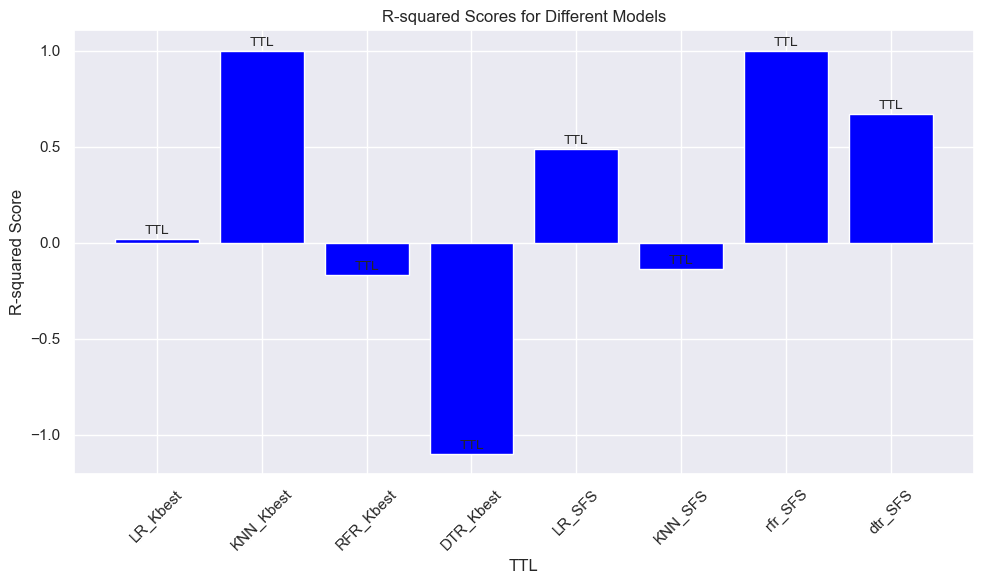

In [22]:
import matplotlib.pyplot as plt

# Create a bar plot
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.bar(algorthim_r2_bar, scorelist_r2_bar, color='blue')
plt.xlabel('TTL')
plt.ylabel('R-squared Score')
plt.title('R-squared Scores for Different Models')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the feature set names above each bar
for i, score in enumerate(scorelist_r2_bar):
    plt.text(i, score + 0.01, feature_r2_bar[i], ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

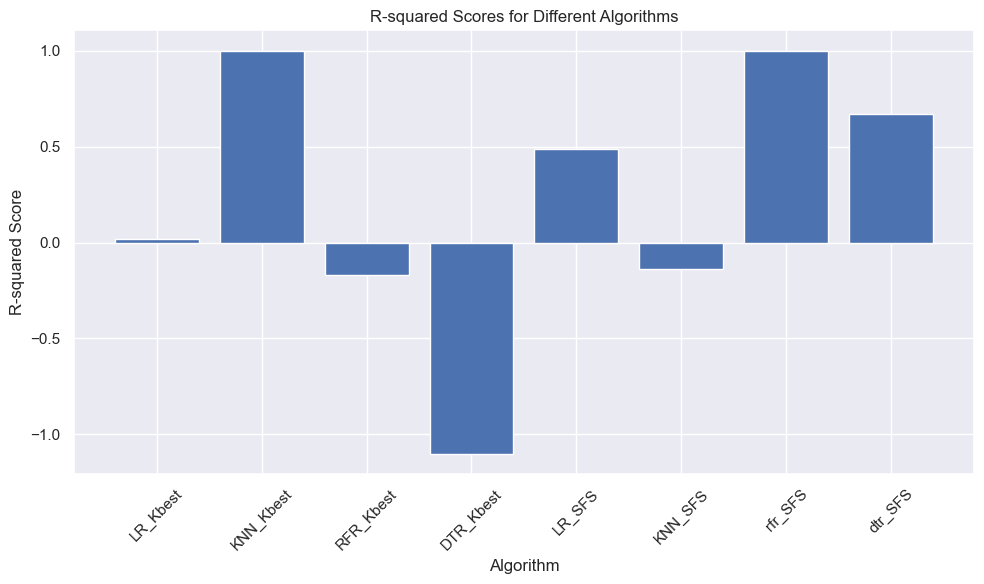

In [23]:
import matplotlib.pyplot as plt


# Create a bar plot
plt.figure(figsize=(10, 6))  # Set the figure size

# Plot the data
plt.bar(algorthim_r2_bar, scorelist_r2_bar)

# Add labels and title
plt.xlabel("Algorithm")
plt.ylabel("R-squared Score")
plt.title("R-squared Scores for Different Algorithms")

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout for better spacing
plt.show()


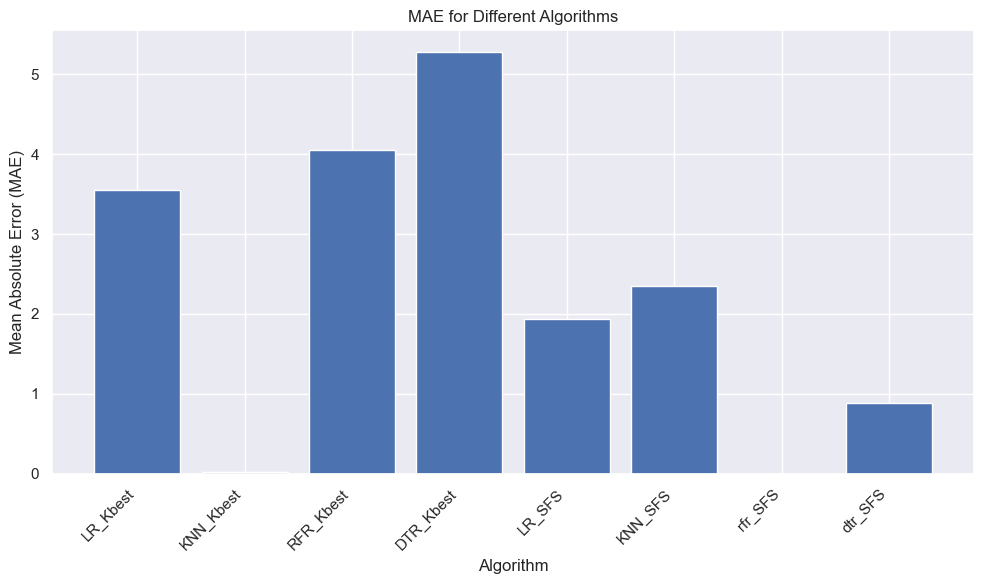

In [27]:
# Create a bar chart
plt.figure(figsize=(10, 6))

# Plot the data as a bar chart
plt.bar(algorthim_mae_bar, scorelist_mae_bar)

# Add labels and title
plt.xlabel("Algorithm")
plt.ylabel("Mean Absolute Error (MAE)")
plt.title("MAE for Different Algorithms")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Show the plot
plt.tight_layout()
plt.show()

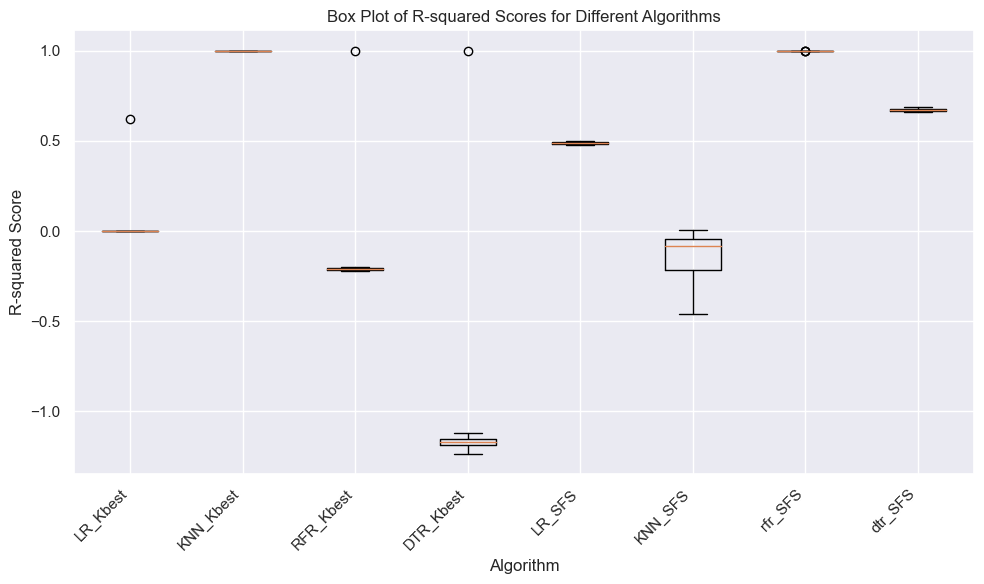

In [25]:
# Create a box plot
plt.figure(figsize=(10, 6))

# Plot the data as a box plot
plt.boxplot(scorelist_r2_box)

# Set x-axis tick labels to algorithm names
plt.xticks(range(1, len(algorthim_r2_box) + 1), algorthim_r2_box, rotation=45, ha="right")

# Add labels and title
plt.xlabel("Algorithm")
plt.ylabel("R-squared Score")
plt.title("Box Plot of R-squared Scores for Different Algorithms")

# Show the plot
plt.tight_layout()
plt.show()

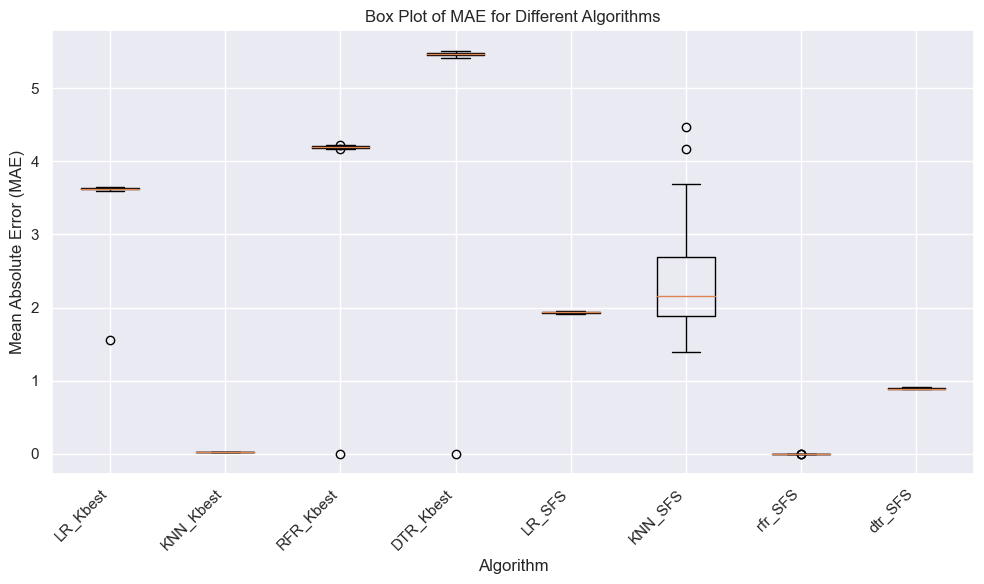

In [26]:
# Create a box plot
plt.figure(figsize=(10, 6))

# Plot the data as a box plot
plt.boxplot(scorelist_mae_box)

# Set x-axis tick labels to algorithm names
plt.xticks(range(1, len(algorthim_mae_box) + 1), algorthim_mae_box, rotation=45, ha="right")

# Add labels and title
plt.xlabel("Algorithm")
plt.ylabel("Mean Absolute Error (MAE)")
plt.title("Box Plot of MAE for Different Algorithms")

# Show the plot
plt.tight_layout()
plt.show()

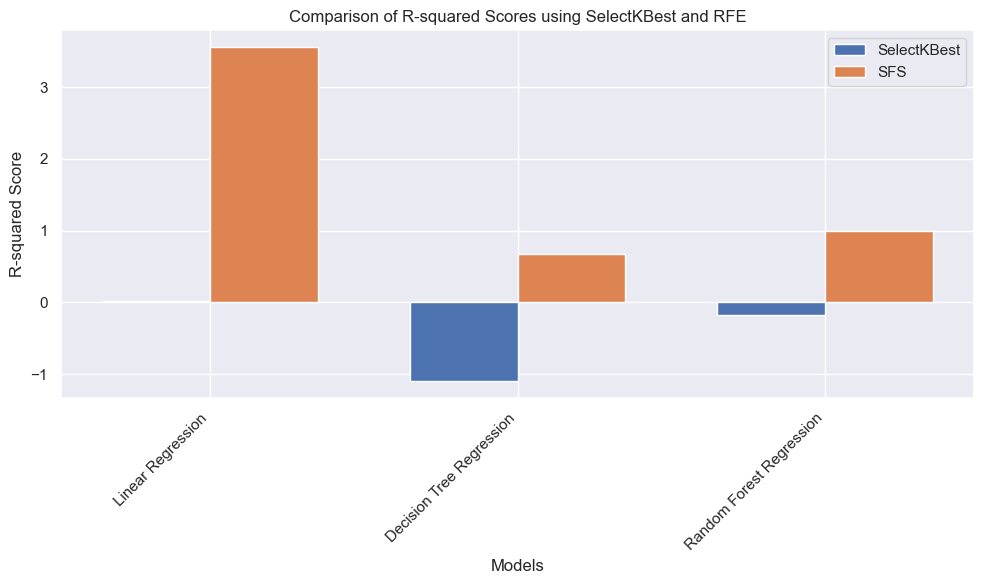

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Your data
models = ['Linear Regression', 'Decision Tree Regression', 'Random Forest Regression']
selectkbest_r2 = [average_r2_Lr_Kbest, average_r2_DTR_Kbest, average_r2_RFR_Kbest]
rfe_r2 = [average_r2_Lr_SFS, average_r2_dtr_SFS, average_r2_rfr_SFS]

x = np.arange(len(models))  # The Label locations
width = 0.35  # The width of the bars

# Create a single bar plot comparing R2 values using SelectKBest and RFE
plt.figure(figsize=(10, 6))

rects1 = plt.bar(x - width/2, selectkbest_r2, width, label='SelectKBest')
rects2 = plt.bar(x + width/2, SFS_r2, width, label='SFS')

# Add labels and title
plt.xlabel("Models")
plt.ylabel("R-squared Score")
plt.title("Comparison of R-squared Scores using SelectKBest and RFE")
plt.xticks(x, models, rotation=45, ha="right")

# Add a legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


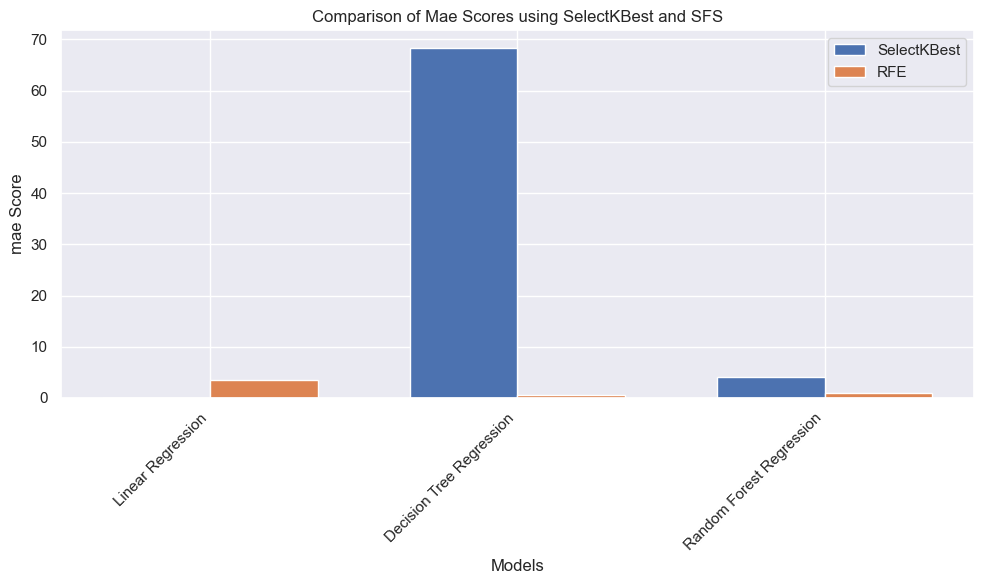

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Your data
models = ['Linear Regression', 'Decision Tree Regression', 'Random Forest Regression']
selectkbest_mae = [average_r2_Lr_Kbest, average_mse_DTR_Kbest, average_mae_RFR_Kbest]
SFS_mae = [average_mae_Lr_Kbest, average_r2_dtr_SFS, average_r2_rfr_SFS]

x = np.arange(len(models))  # The Label locations
width = 0.35  # The width of the bars

# Create a single bar plot comparing R2 values using SelectKBest and RFE
plt.figure(figsize=(10, 6))

rects1 = plt.bar(x - width/2, selectkbest_mae, width, label='SelectKBest')
rects2 = plt.bar(x + width/2, SFS_mae, width, label='SFS')

# Add labels and title
plt.xlabel("Models")
plt.ylabel("mae Score")
plt.title("Comparison of Mae Scores using SelectKBest and SFS")
plt.xticks(x, models, rotation=45, ha="right")

# Add a legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


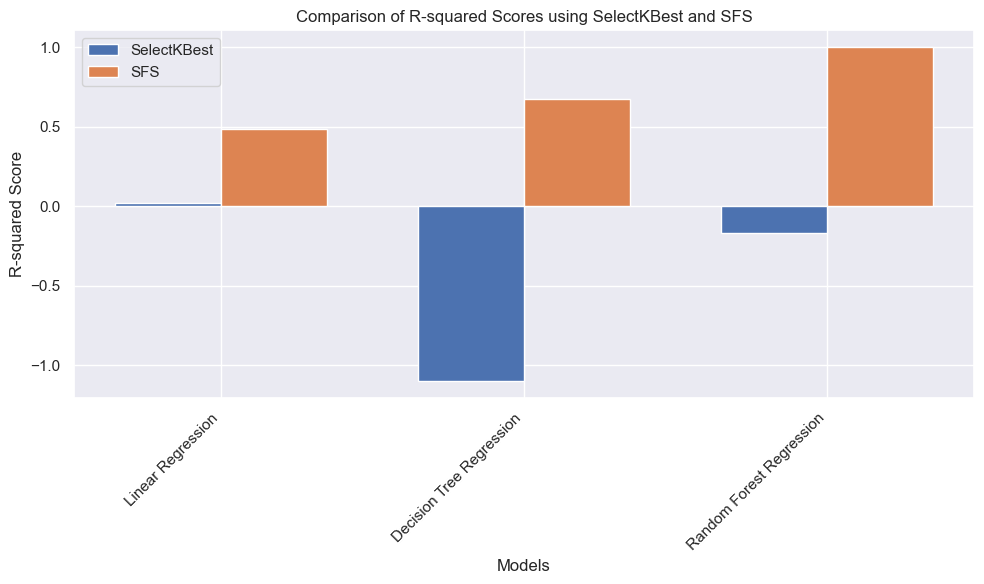